In [6]:
import pandas as pd
from sklearn import *

%matplotlib inline

In [4]:
df = pd.read_csv("/data/creditcard-fraud.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


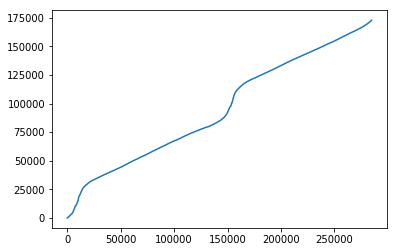

In [7]:
df.Time.plot()

In [10]:
training_size = int(len(df) * 0.7)
training_size

199364

In [19]:
X_train = df.loc[:training_size, "V1":"V28"]
X_test = df.loc[training_size:, "V1":"V28"]
y_train = df.loc[:training_size, "Class"]
y_test = df.loc[training_size:, "Class"]

In [20]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153


In [15]:
len(X_train), len(X_test)

(199365, 85443)

In [16]:
len(X_train)/len(df), len(X_test)/len(df)

(0.7000003511149656, 0.3000031600346902)

In [3]:
df.default.value_counts()

1    700
2    300
Name: default, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [25]:
pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LogisticRegression(random_state=1))
])
pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)
metrics.confusion_matrix(y_test, y_test_pred)

array([[85321,    14],
       [   53,    55]])

In [6]:
pd.DataFrame({"actual": y_test, "prediction": y_test_pred})

,actual,prediction
0,1,0
1,0,1
2,0,0
3,1,1
4,1,1
5,0,1
6,0,0
7,0,0
8,0,0
9,0,0


In [7]:
metrics.confusion_matrix(y_test, y_test_pred)

array([[188,  26],
       [ 47,  39]])

In [11]:
len(y_test)

300

In [12]:
188 + 26 + 47+39

300

In [10]:
metrics.accuracy_score(y_test, y_test_pred)

0.7566666666666667

In [13]:
(188+39)/300

0.7566666666666667

In [14]:
pd.Series(y_train).value_counts()

0    486
1    214
dtype: int64

In [15]:
pd.Series(y_train).value_counts()/700

0    0.694286
1    0.305714
dtype: float64

In [16]:
pd.Series(y_test).value_counts()/300

0    0.713333
1    0.286667
dtype: float64

In [27]:
import numpy as np

In [37]:
y_test_prob = pipe.predict_proba(X_test)[:, 1] # Find probability(transaction is fraud)
y_test_pred = np.where(y_test_prob > 0.5, 1, 0) # Using a threshold we are prediction class
print(metrics.confusion_matrix(y_test, y_test_pred))
print("Accuracy:", metrics.accuracy_score(y_test, y_test_pred))
print("Precision:", metrics.precision_score(y_test, y_test_pred))
print("Recall:", metrics.recall_score(y_test, y_test_pred))

[[85321    14]
 [   53    55]]
Accuracy: 0.9992158515033414
Precision: 0.7971014492753623
Recall: 0.5092592592592593


In [36]:
y_test_prob = pipe.predict_proba(X_test)[:, 1]
y_test_pred = np.where(y_test_prob > 0.2, 1, 0)
print(metrics.confusion_matrix(y_test, y_test_pred))
print("Accuracy:", metrics.accuracy_score(y_test, y_test_pred))
print("Precision:", metrics.precision_score(y_test, y_test_pred))
print("Recall:", metrics.recall_score(y_test, y_test_pred))

[[85304    31]
 [   36    72]]
Accuracy: 0.9992158515033414
Precision: 0.6990291262135923
Recall: 0.6666666666666666


In [45]:
y_test_prob = pipe.predict_proba(X_test)[:, 1]
y_test_pred = np.where(y_test_prob > 0.5, 1, 0)
print(metrics.confusion_matrix(y_test, y_test_pred))
print("Accuracy:", metrics.accuracy_score(y_test, y_test_pred))
print("Precision:", metrics.precision_score(y_test, y_test_pred))
print("Recall:", metrics.recall_score(y_test, y_test_pred))
print("F1:", metrics.f1_score(y_test, y_test_pred))
print("tpr:", 40 / (40+68))
print("fpr:", 14 / (14+53))

[[85321    14]
 [   53    55]]
Accuracy: 0.9992158515033414
Precision: 0.7971014492753623
Recall: 0.5092592592592593
F1: 0.6214689265536724
tpr: 0.37037037037037035
fpr: 0.208955223880597


accuracy [0.999], Recall [0.509], Precision [0.797], AUC [0.97], F1 score [0.62], TPR [0.37], FPR [0.20]

In [43]:
p = 0.9523809523809523
r = 0.37037037037037035
2 * p * r / (p+r)


0.5333333333333333

In [39]:
import matplotlib.pyplot as plt

Text(0.5,1,'ROC, auc = 0.9707251811488056')

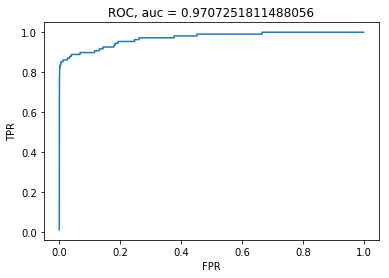

In [40]:
y_test_prob = pipe.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_test_prob)
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
auc = metrics.auc(fpr, tpr)
plt.title("ROC, auc = " + str(auc))
# auc: indicates the goodness of the model. Range is between (0, 1), closer to 1 is better
# best value of auc is 1.
# auc is a scoring of a model which is independent of the threshold values.
# auc is used for model selection